# House Pricing Prediction and API with Flask

<img src="img/home.png" width="30%" height="20%">

¿Can we determine the house prices given some data with Machine Learning? Absolutely yes, and that is we are going to do today.
But instead of previous works that we did that we have machine learning production ready models and a dashboard, we will know implement an API, that is Application Program Interface, in simple words, a base interface of data to query and result something, could be a program but in this case a machine learning model.

Let's go and understand the problem first!

## Problem Statement

You are hired as a sub-contractor to deliver a product based machine learning via API to the company 'Big Houz Dreamz'.  They have two key users, people looking a home for second investment and the others based on real-state agents that helps to sell homes.

The CTO (Chief Technology Officer) requests to you to finish a project of home predictions that the internal clients could use to fetch information.  The CTO says he just needs the AI part because he have FullStack Engineers that can build the complete app based on other technologies, but they do not know much about machine learning so he outsurced for your services.

We both agree about the price of 25000 USD to develop the model and the application in one or two weeks so let's do it!

### Installation of Prerequesites

In [1]:
!pip install graphviz
!pip install dill
!pip install xgboost
!pip install openpyxl

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
import dill
from sklearn.tree import plot_tree
import xgboost as xg
warnings.filterwarnings('ignore')

### Importing Data with Pandas

As we did in previous notebooks we will use pandas to load and analyze a little bit the data.  Pandas is  probably the way to go to reading files.
There are plenty of functions to read with pandas, csv files, json, parquet, hdf, excel and others important files.

In [2]:
df = pd.read_csv('regressiondata.csv', index_col='ID') # Read the dataset and put ID as the index rows
df.head(10) # 10 first rows

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963
5,2020.02,16.0,806.752405,1.0,5212.0,281262
6,2019.01,12.0,561.741678,5.0,5614.0,324167
7,2019.06,2.0,612.550897,4.0,5213.0,343720
8,2020.03,40.0,70.565801,8.0,5222.0,668514


In [3]:
df.tail(10) # 10 first rows

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9346,2020.12,28.0,660.048709,6.0,5614.0,499416
9347,2021.11,42.0,55.471283,6.0,5213.0,299381
9348,2021.12,17.0,647.585874,8.0,5212.0,271530
9349,2021.09,12.0,1601.467269,1.0,5222.0,370851
9350,2021.10,32.0,5327.995740,1.0,5222.0,178361
9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,2021.10,6.0,87.260667,9.0,5614.0,681072


Did you identified the target value? No. Well if we are predicting house prices our target values is `HousePrice`.

Let's see an specific random row.  If you excecute several times you will se that you get different values due to the random function.

In [4]:
row = np.random.randint(len(df))
df.loc[row]

TransactionDate         2021.12
HouseAge                   18.0
DistanceToStation    347.731766
NumberOfPubs                8.0
PostCode                 5212.0
HousePrice               170314
Name: 8452, dtype: object

### Creating the train and test set partitions

We will always split the data in training and test.  Then we could analyze the training data to get information about the behaviour of the clients, first splitting via stratification and check the information that our data gives us to make a machine learning model.  Note that, splitting and analyzing data are the most important parts to get a good machine learning model.

<img src="img/traintest.png" width="50%" height="100%">

Usually we will split the dataset in train and test.  `Training` is obviously the data that the model use for training and `Test` is the dataset that the model uses for evalation.  One thing to note is that the dataset of test is not data seen by the model previously.  Tipycal partitions are 80/20, 70/30 and so on.

In [5]:
train, test = train_test_split(df, test_size=0.2, random_state=42, ) # split data in train and test

In [6]:
type(train) # type of the data

pandas.core.frame.DataFrame

In [7]:
train.head(19) # see the trian partition

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
794,2020.03,41.0,282.951181,8.0,5213.0,471805
2833,2020.02,12.0,1586.124721,1.0,5222.0,296951
3026,2020.10,17.0,1847.086970,3.0,5222.0,218155
3128,2019.10,32.0,1254.952795,0.0,5217.0,99830
5117,2020.10,18.0,1366.663705,1.0,5222.0,310561
8471,2021.07,9.0,505.861071,1.0,5222.0,530881
4267,2019.06,5.0,23.914681,9.0,5614.0,570958
251,2019.03,3.0,398.529792,5.0,5222.0,595223
3795,2021.03,10.0,255.671616,5.0,5217.0,461667


### EDA (Exploratory Data Analysis)

#### EDA.1 (Bird's Eye View)

We now are in the most important part, exploratory data analysis.  We will do univariate analyss, that is the analysis of the objective value vs the other columns and bivariate analysis graphs using in both cases both, numerical and categorical data, but this time is only numerical data so we could continue the univariate.

The EDA will lead us to find again, as stated, insights of the data and also find those outliers that will be handled later to not affect the model.  Also, with EDA, we will make the dataset more cleaner with transformations before we feed in our machine learning algorithm leading to a better model.

<img src="img/eda.png" width="30%" height="100%">

Let's have a look at first at the data types

In [8]:
train.dtypes # see data types

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [9]:
df.head(2) # see the first two rows

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714


If you inspect each row correctly one by one you see at first that the `TransactionDate` must be changed from `year.month` to `year` and `month`, and better `month` to be categorical to find a better relationship, not numerical.  

Next following the order we see the house age to be numerical, and so on, but if you see the `PostCode`, you will see that even if is tagged as float it must be categorical, because if we leave this marked as a number probably our machine learning model will confuse saying it is a relationship between the PostCode and the HousePrice is more important to one post code numerical value is more important to another related to the behaviour of the customer.

Same of `HousePrice` must be changed from `object` to `int`. So we need to do more curation over the dataset.

In [10]:
train.info() # get more general info of the dataset to see if we have some nulls

<class 'pandas.core.frame.DataFrame'>
Index: 7484 entries, 794 to 7270
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    7482 non-null   float64
 1   HouseAge           7480 non-null   float64
 2   DistanceToStation  7482 non-null   float64
 3   NumberOfPubs       7483 non-null   float64
 4   PostCode           7484 non-null   float64
 5   HousePrice         7479 non-null   object 
dtypes: float64(5), object(1)
memory usage: 409.3+ KB


We know we will see the summary statistics of numerical features and later with the categorical data for analyzing it too.

In [11]:
train.describe() # summary statistics (numerical)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,7482.000000,7480.000000,7482.000000,7.483000e+03,7484.000000
mean,2020.062999,17.445856,1100.440755,6.722479e+02,5294.696686
std,0.816790,11.434859,1274.683983,5.780051e+04,158.514577
min,2019.010000,0.000000,23.914681,0.000000e+00,5212.000000
25%,2019.090000,9.000000,268.604631,1.000000e+00,5213.000000
50%,2020.070000,16.000000,551.667602,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1537.741692,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


Looking at the numerical features we see, in example that `DistanceToStation standard deviation` is a little high, that means that the data is wide and disperse, and finally look at the `NumberOfPubs`, there is a maximun value that is `1000 times` bigger than the mean, we definitely need to have a look over the data to see more about it.

Let's do some basic transformations of the data to fit it to proper values, i.e. `PostCode` as str.

In [12]:
train.loc[:, 'PostCode'] = train.loc[:, 'PostCode'].astype(str)               # assign strings and prevent warning of code
train.loc[:, 'TransactionDate'] = train.loc[:, 'TransactionDate'].astype(str)

Before continuing you noted that i did note change the `HousePrice` to float, if we inspect the dataset, we will see a bit later that we have some odd values `??`.  So we will continue analyzing and get back from it later.

In [13]:
train.loc[train.HousePrice=='??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5620,2021.04,34.0,460.489917,5.0,5222.0,??
8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [14]:
train.describe(include=object) # summary statistics (categorical)

,TransactionDate,PostCode,HousePrice
count,7484,7484,7479
unique,37,5,7426
top,2021.06,5222.0,401746
freq,243,1544,2


#### EDA.2 (Visualizing Distributions)

We will now analyze some numerical and categorical attributes visually to see the distributions for visualization using libraries like seaborn that have a great visualization and is simpler that matplotlib.

<img src="img/matplotlib.png" width="70%" height="100%">

<img src="img/seaborn.png" width="70%" height="100%">

Is a good idea to see data distributions, so for example is good if we have image data to see distribution over the same data and if we got tabular data see the distribution of the columns and so on.

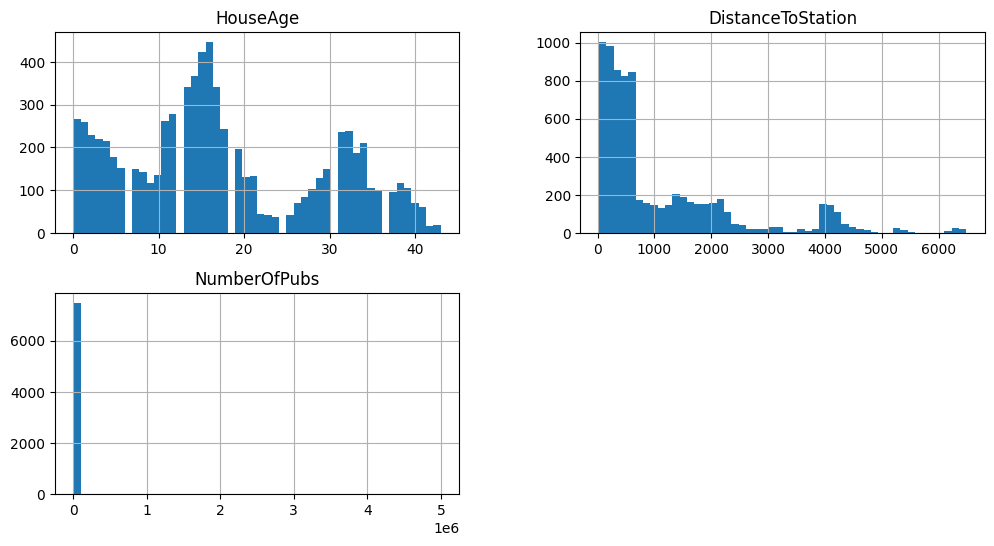

In [15]:
train.hist(figsize=(12,6), bins=50); # plot distributions of numerical data

- Looking the `HouseAge` we see a widespread distribution.
- For `DistanceToStation` we see that probably we could improve it with a `log transform`
- `NumberOfPubs` definitely has an outlier that probably we need to remove because majority of data is near 0.

#### EDA.3 (Looking why the houseprice has some odd values)

If we remember some lines above we saw that `HousePrice` has two `??` values, let's find why and fix it.

In [16]:
train.loc[train.HousePrice=='??'] # filter for all rows containing HousePrice = ??

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5620,2021.04,34.0,460.489917,5.0,5222.0,??
8718,2020.08,16.0,122.432508,5.0,5213.0,??


OK, usually i did not drop these rows, but because probably the data is not significant, if we saw the describe previously, it will not lead us in odd situations on the modeling, so let's do it.

In [17]:
train = train[train.HousePrice!='??'] # drop these rows

In [18]:
train.loc[train.HousePrice=='??'] # validation (see if the rows where dropped)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [19]:
train.loc[:, 'HousePrice'] = train.loc[:, 'HousePrice'].astype(float) # transform all rows to float (prevent warning)

OK, let's see the boxplot to `HousePrice` to see the distributions

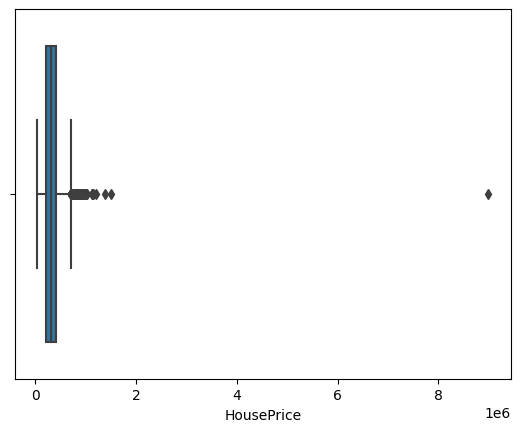

In [20]:
sns.boxplot(data=train, x='HousePrice');

Interestingly we see that we have a very big outlier in the dataset, so we need to preparate more this column

In [21]:
train.loc[train.HousePrice > 8e6]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0


In [22]:
train = train.drop(8445)

#### EDA.4 (Handling the outliers)

We will have to sor the values of the column in study to see what's happening

In [23]:
train.sort_values(by='HousePrice', ascending=False).head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
5091,2020.05,10.0,295.072723,1.0,5614.0,1151940.0
7815,2020.03,10.0,243.985418,1.0,5614.0,1149746.0


We are seeing that we have a massive outlier over the HousePrice, so let's first drop it.

In [24]:
train[train.HousePrice.isna()]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
48,nan,13.0,1214.171333,1.0,5614.0,NaN
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8106,2020.04,12.0,62.680175,7.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN


Now as we see we have some nans that we can impute by the algorithm later.

#### EDA.5 Analyzing NumberOfPubs

In [25]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
6360,2020.07,33.0,81.139117,10.0,5217.0,417618.0
2312,2021.11,31.0,182.575915,10.0,5217.0,350042.0
5793,2020.01,4.0,423.427497,10.0,5217.0,467894.0
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0


OK, we have an outlier to delete here.  Look at `NumberOfPubs` line 13.

In [26]:
train.drop(13, inplace=True)

If we see the distribution again we see that we have now improved the dataset a little.

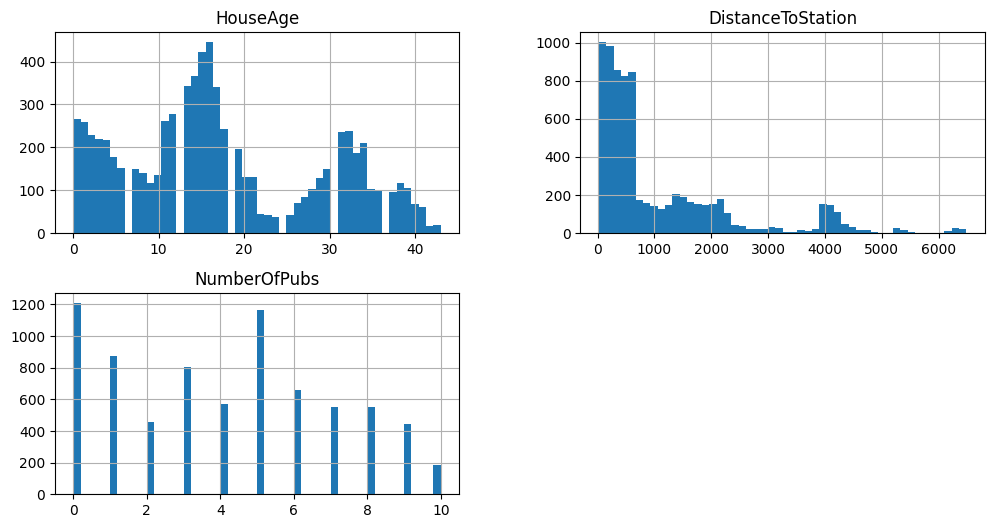

In [27]:
train.hist(figsize=(12, 6), bins=50);

#### EDA.6 Analyzing Categorical Variables

Now start ploting all categorical variables

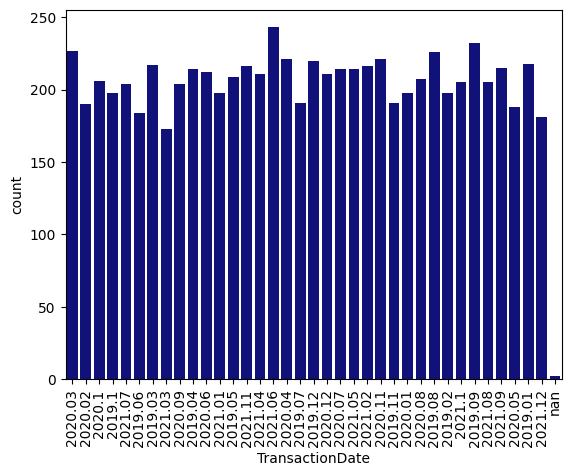

In [28]:
sns.countplot(x='TransactionDate', data=train, color='darkblue')
plt.xticks(rotation=90);

OK, here we see the analysis of the transaction date per year and month in the training data, but it is not sorted correctly per year and date, so we will discuss it later.

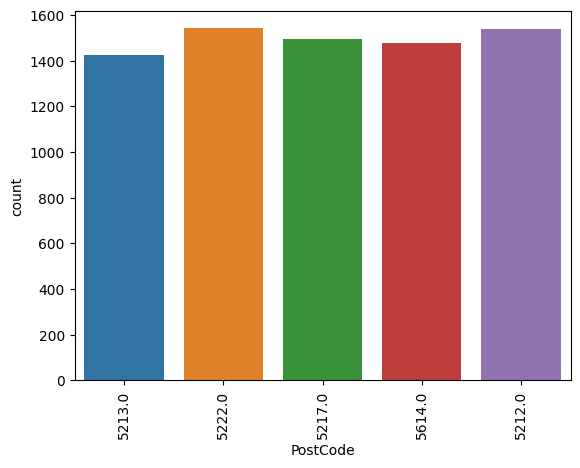

In [29]:
sns.countplot(x=train['PostCode'])
plt.xticks(rotation=90);

We saw that per `PostCode` is well balanced, we stated before that this is a non numeric data and we must convert it to string to make the algorithm get the correct balance of and find the correct correlations of the data (in this case the postal code).

Now let's talk about the analysis of numeric and numeric data, we will find the correlations.  Correlations (in this case linear correlations) will tell us which variable is dependant of another, that is, if we find, i.e. a variable1 and variable2 with 1.0 it is understood that this positive correlation says that when one variable increments the other too, 1.00 is a strong correlation between variable1 and variable2.

On the other hand, a negative correlation between variable1 and variable2 like -1.0, says that when one varible is increasing the other keeps decreasing.  One thing to note is that this only detects linear correlations, if the amount of correlation is not linear, we will detect 0.0, but also 0.0 means there is no correlation so it is difficult to know if there is no correlation about linearity or non-linearity using only this analysis.

Let's analyze the numerical data at first.

In [30]:
train.corr()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
TransactionDate,1.000000,0.013579,0.012879,-0.010332,0.001689,0.205915
HouseAge,0.013579,1.000000,0.026010,0.044890,0.014942,-0.160459
DistanceToStation,0.012879,0.026010,1.000000,-0.588086,-0.000199,-0.546814
NumberOfPubs,-0.010332,0.044890,-0.588086,1.000000,0.006057,0.461756
PostCode,0.001689,0.014942,-0.000199,0.006057,1.000000,0.175426
HousePrice,0.205915,-0.160459,-0.546814,0.461756,0.175426,1.000000


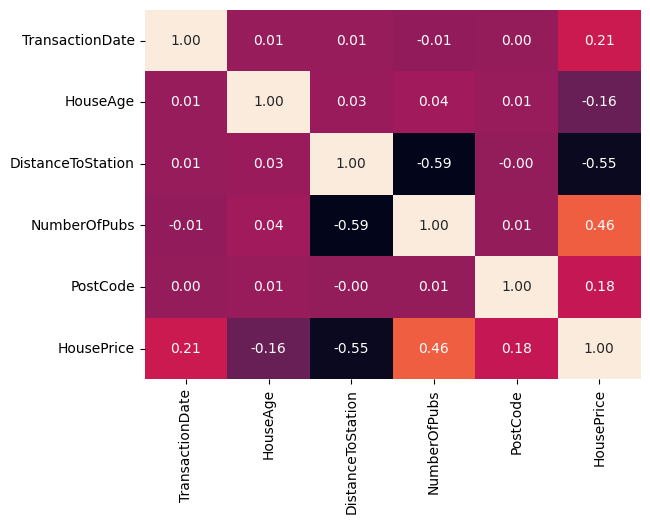

In [31]:
sns.heatmap(train.corr(), fmt='.2f', annot=True, cbar=False)
plt.xticks(rotation=90);

Treat Properly variables

In [32]:
train.PostCode = train.PostCode.astype(str)
train.HousePrice = train.HousePrice.astype(np.float32)

OK, let's find a better view between HousePrice and Distance to station using a ScatterPlot.

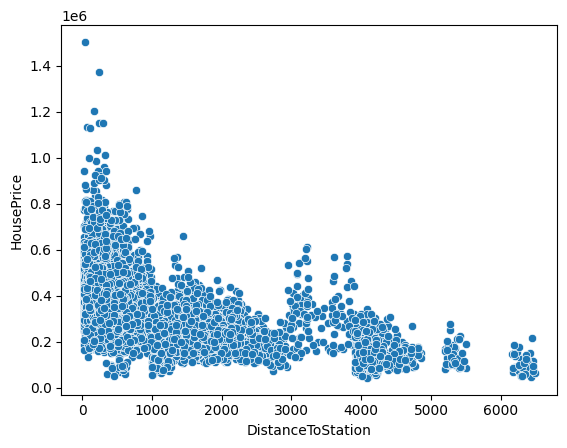

In [33]:
sns.scatterplot(data=train, x='DistanceToStation', y='HousePrice');

What we can conclude about the data seen here?. Well that probably the more near to the Station the more expensive the house is.

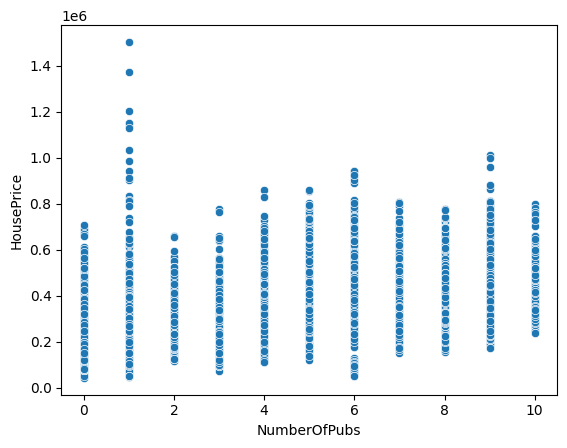

In [34]:
sns.scatterplot(data=train, x='NumberOfPubs', y='HousePrice');

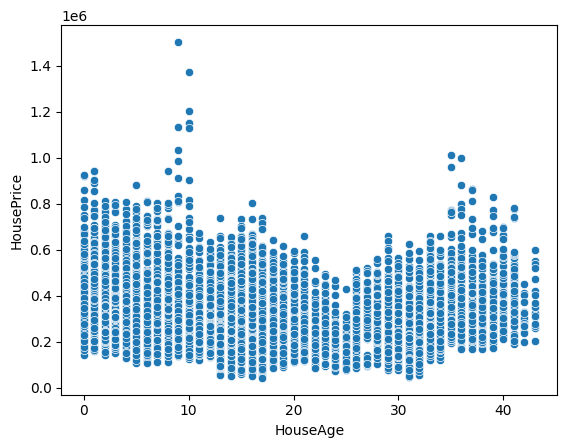

In [35]:
sns.scatterplot(data=train, x='HouseAge', y='HousePrice');

#### EDA.7 PostCode

Let's use a violinplot to see the relationtip about the target variable and postcode

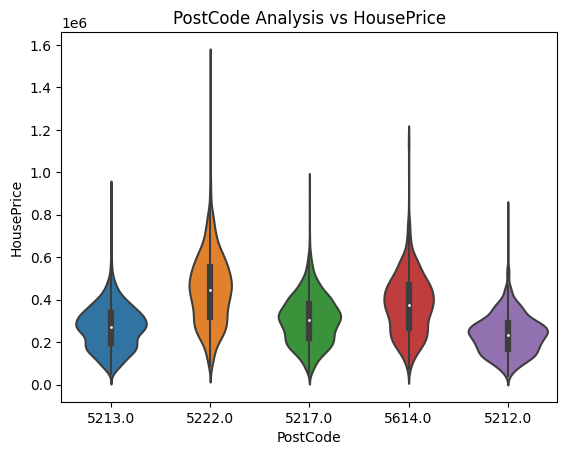

In [36]:
plt.title('PostCode Analysis vs HousePrice')
sns.violinplot(data=train, x='PostCode', y='HousePrice');

Looking about the distribution of the data we could see that 5213 and 5212 and 5217 distributions are nearly equals in distributions and 5614 wutg 5222 practically the same but 5222 have a wide range of values distributed that tells us that probably the post code and house prices is varying.

#### EDA.7 Working with Dates

In [37]:
train[train['TransactionDate'].isnull()] # check missing values

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [38]:
train[train['TransactionDate']=='nan'] # check for written nan values

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
48,nan,13.0,1214.171333,1.0,5614.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN


We saw something weird, that we have a house prices in Nan so we will exclude them from the dataset this time.

In [39]:
train = train[~train.HousePrice.isnull()] # drop missing values from transaction date 
train[train.HousePrice.isna()]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


Let's work with the date and get the year and month sold of the house.

In [43]:
train['year'] = train.TransactionDate.apply(lambda x: x[:4]).astype(int)
train['month'] = train.TransactionDate.apply(lambda x: x[5:]).astype(int)
train['month'] = train.month.apply(lambda x: f'{x:02}')

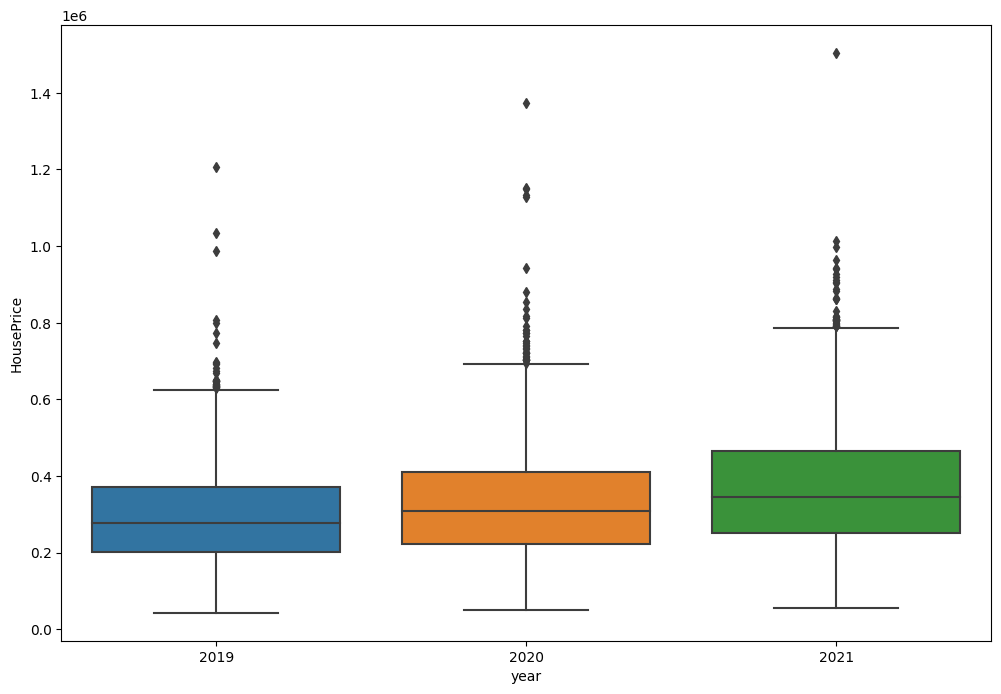

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=train, x='year', y='HousePrice', ax=ax);

If we look closely, the prices is increasing every year (and also the Q3 or quartile 3), even the mean value is increasing year by year.

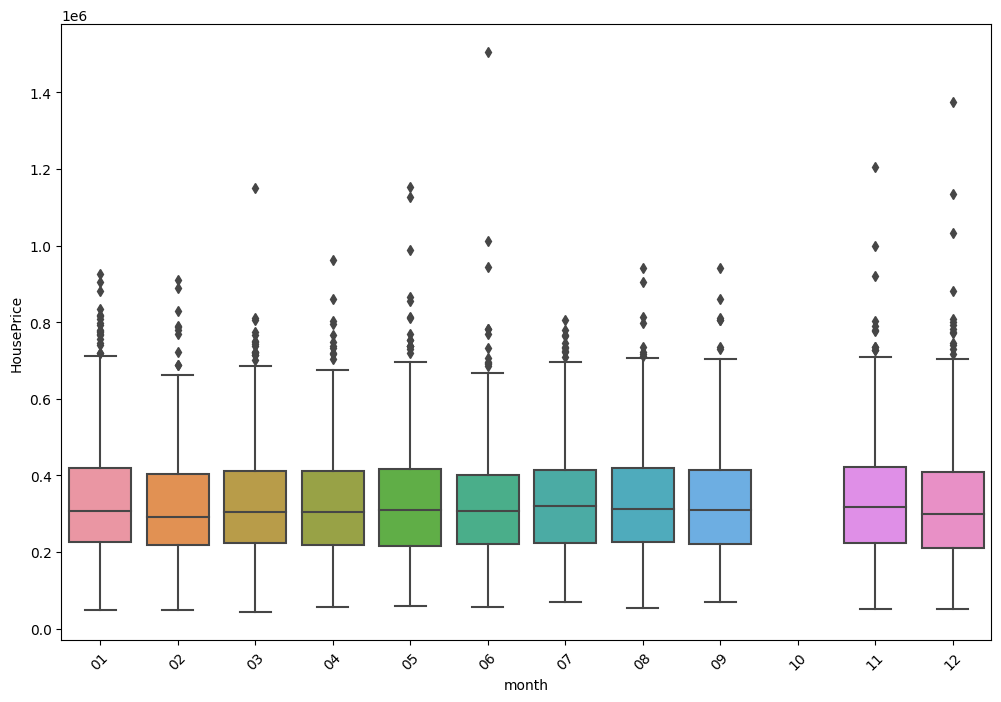

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
order=[f'{x+1:02}' for x in range(12)]
sns.boxplot(data=train, x='month', y='HousePrice', ax=ax, order=order)
plt.xticks(rotation=45);

OK, as we see there is a relationship, but not as evident as the others seen that is really easy to view.

## Building Preprocessing Functions with Scikit-Learn

We will build a preprocessing function of scikit-learn called SimpleImputer, OneHotEncoder and StandardScaler.

We will build a class that will apply preprocessing and we can use in a pipeline

### Data_Preprocess.1

In [51]:
class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names_out = None
        
    def fit(self, X, y=None): # train on custom preprocessor
        self.imputer = SimpleImputer() # apply imputer
        self.imputer.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        self.scaler = StandardScaler() # apply scaler
        self.scaler.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])        
 
        self.ohe = OneHotEncoder(handle_unknown='ignore') # apply one hot encoding
        self.ohe.fit(X[['PostCode', 'month']])
        
        return self
    
    def transform(self, X): # apply and return a transform
        transformed_df = X.copy()     

        # apply to year.month
        transformed_df['year'] = transformed_df.TransactionDate.apply(lambda x: x[:4]).astype(int)
        transformed_df['month'] = transformed_df.TransactionDate.apply(lambda x: x[5:]).astype(int)
        transformed_df['month'] = transformed_df.month.apply(lambda x: f'{x:02}')

        # imput and scale
        imputed_columns = self.imputer.transform(transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        transformed_df[['HouseAge','DistanceToStation', 'NumberOfPubs']] = self.scaler.transform(imputed_columns)

        # make one hot encoders
        ohe_columns = self.ohe.transform(transformed_df[['PostCode', 'month']])
        transformed_df = transformed_df.drop(['year', 'TransactionDate', 'PostCode', 'month'], axis=1)
        transformed_df[self.ohe.get_feature_names_out()] = ohe_columns.toarray().astype(int)
        
        self.feature_names_out = transformed_df.columns
    
        return transformed_df
    
    def get_feature_names_out(self):
        return self.feature_names_out

In [52]:
preprocess = Preprocessor()
preprocess.fit(train)
preprocess_df = preprocess.transform(train)

### Data_Preprocess.2 - Visualization

In [53]:
preprocess_df.head()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_11,month_12
ID,,,,,,,,,,,,,,,,,,,,
794,2.059663,-0.641522,1.332432,471805.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2833,-0.476502,0.380768,-1.038259,296951.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3026,-0.039233,0.585483,-0.360919,218155.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3128,1.272577,0.120977,-1.376929,99830.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5117,0.048221,0.208609,-1.038259,310561.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


As we say, in the end only we have numerical data and is preprocessed at the center too, let-s see if the correct format is ready to the machine learning model.

In [54]:
preprocess_df.dtypes

HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
HousePrice           float32
PostCode_5212.0        int32
PostCode_5213.0        int32
PostCode_5217.0        int32
PostCode_5222.0        int32
PostCode_5614.0        int32
month_01               int32
month_02               int32
month_03               int32
month_04               int32
month_05               int32
month_06               int32
month_07               int32
month_08               int32
month_09               int32
month_11               int32
month_12               int32
dtype: object

In [55]:
preprocess_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7475 entries, 794 to 7270
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HouseAge           7475 non-null   float64
 1   DistanceToStation  7475 non-null   float64
 2   NumberOfPubs       7475 non-null   float64
 3   HousePrice         7475 non-null   float32
 4   PostCode_5212.0    7475 non-null   int32  
 5   PostCode_5213.0    7475 non-null   int32  
 6   PostCode_5217.0    7475 non-null   int32  
 7   PostCode_5222.0    7475 non-null   int32  
 8   PostCode_5614.0    7475 non-null   int32  
 9   month_01           7475 non-null   int32  
 10  month_02           7475 non-null   int32  
 11  month_03           7475 non-null   int32  
 12  month_04           7475 non-null   int32  
 13  month_05           7475 non-null   int32  
 14  month_06           7475 non-null   int32  
 15  month_07           7475 non-null   int32  
 16  month_08           7475 non

### Data_Preprocess.2 - Visualization

In [56]:
preprocess_df

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_11,month_12
ID,,,,,,,,,,,,,,,,,,,,
794,2.059663,-0.641522,1.332432,471805.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2833,-0.476502,0.380768,-1.038259,296951.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3026,-0.039233,0.585483,-0.360919,218155.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3128,1.272577,0.120977,-1.376929,99830.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5117,0.048221,0.208609,-1.038259,310561.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.214141,-0.780109,0.316421,337155.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5191,1.185123,-0.618938,1.671102,347520.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5390,-1.525950,-0.714266,0.655091,523231.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


Finally we will drop the HousePrice as it is the target variable, we will divide it in features and lable.

In [57]:
X_train = train.drop('HousePrice', axis=1)
y_train = train.HousePrice

## Modeling

It is time to start the modeling part!  Now that we have the clean dataset, we can start searching for a good model in all the machine learning algorithms, let's keep going.

The first think we will do is to make a pipeline, you could think of a pipeline like a workflow, that something keeps executing at first and later the other process in the workflow.

<img src="img/pipeline.webp" width="70%" height="100%">

The second think and the most important algorithm (in terms of easy explanation) is the regressor of random forests, it will build an ensemble of different small models and in the end will make the summation and will bring the output of that summation as the regression.  There are a lot of machine learning algorithms that you can apply so view the scikit-learn documentation to validate them.

<img src="img/randomforestregressor.png" width="70%" height="100%">

With gradient boosting (and extreme gradient boosting) the things are a little bit different, we will build several weak learners that will be inputed from one to another forming a strong learner, in the end ensemble algorithms outperforms usually normal algorithms, so let's see how we do.
<img src="img/gradientboosting.png" width="70%" height="100%">

### Modeling.1

OK, now we will go and create the pipeline of all the models.  First we will lista a tuple of models that we will use.

In [58]:
models = [
    ('RD', Ridge()),
    ('RF', RandomForestRegressor()),
    ('GB', GradientBoostingRegressor()),
    ('XG', XGBRegressor())
]

### Modeling.2

We will build the hyperparameter tunning grid.  You will see later that we will jump on each model and grab these parmeters that are part of each algorithm and start tryin different on it. for example, and this is from the pipeline, our pipeline, the model part is named `model`, so we need to access the `Ridge` parameter `alpha`; we need to refer at first to the model in the pipeline and name the parapeter after two `__`.  

The parameter grid has a dictionary over it, do not worry, this is because we will know later that we will be looping around each algorithm described as a simplified two letter to follow the algorithm to train.

In [59]:
paramgrid = {
    'RD':{'model__alpha':[0.05, 0.25, 0.5, 1.0]},
    'RF':{'model__n_estimators':[100, 200, 300, 400],
          'model__max_depth':[5, 6, 7, None]},
    'GB':{'model__n_estimators':[100, 200, 300, 400],
          'model__max_depth':[5, 6, 7, None]},  
    'XG':{'model__n_estimators':[100, 200, 300, 400],
          'model__max_depth':[5, 6, 7, None]} 
}

Now we will loop against all the models and apply the pipeline, finally we will fit the model, train and save the baseline models.

- First we will build the pipelines steps.
- Next, when built the pipeline we will perform an hyperparameter tunning job to do gridsearch over all the jobs.
- We will fit the model and later store each model results inside a dictionary

An additional note.
- Look that the parameter grid loop over each model because we have a dictionary.

In [60]:
%%time
fitted_model = dict()
for name, model in models:
    print(f'[INFO] - Starting {name}')
    steps = [('preprocessor', Preprocessor()), ('model', model)]
    pipe = Pipeline(steps=steps)
    grid = GridSearchCV(pipe, paramgrid[name], n_jobs=-1, cv=10, scoring='r2')
    grid.fit(X_train, y_train)
    fitted_model[name] = grid
    print(f'[INFO] - Finished {name}')

[INFO] - Starting RD
[INFO] - Finished RD
[INFO] - Starting RF
[INFO] - Finished RF
[INFO] - Starting GB
[INFO] - Finished GB
[INFO] - Starting XG
[INFO] - Finished XG
CPU times: total: 16.8 s
Wall time: 7min 45s


## Evaluate, Predict and Score the Model

Next after finishing of training our pipelines and storing in the models variable, before applying the evaluations on each model we will need to look about the values of the test dataset.

### Evaluate.1
Let's check the info.

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 4635 to 6151
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    1872 non-null   float64
 1   HouseAge           1872 non-null   float64
 2   DistanceToStation  1872 non-null   float64
 3   NumberOfPubs       1871 non-null   float64
 4   PostCode           1870 non-null   float64
 5   HousePrice         1870 non-null   object 
dtypes: float64(5), object(1)
memory usage: 102.4+ KB


In [62]:
test.isnull().sum()

TransactionDate      0
HouseAge             0
DistanceToStation    0
NumberOfPubs         1
PostCode             2
HousePrice           2
dtype: int64

### Evaluate.2 - Remove Nulls

OK, here we see 2 null values in the HousePrice variable (the target), it doesn't make sense to have it here because if we didn't know the target (or could get from the source) is better to drop.

In [63]:
test = test[~test.HousePrice.isnull()]

In [64]:
test.isnull().sum() 

TransactionDate      0
HouseAge             0
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

Nice, we have no null values, but if we did have a variable that is not null and not referring to the HousePrice, remembet that we imputed this one on the algorithm.

For the next line, remember to overcome the `??` string value on HousePrice to keep the dataset clean

### Evaluate.3

Validate the test data

In [65]:
test = test[~(test.HousePrice=='??')]
test['HousePrice'] = test['HousePrice'].astype(float)
test['TransactionDate'] = test['TransactionDate'].astype(str)
test['PostCode'] = test['PostCode'].astype(str)

### Evaluate.4

Create the features and targets

In [66]:
X_test = test.drop('HousePrice', axis=1)
y_test = test.HousePrice

In [67]:
X_test.shape, y_test.shape

((1869, 5), (1869,))

### Evaluate.5

Now let's loop over ach algorithm and get the algorithm, finally make some predictions and store in a dataframe to later select the best of the models based on Mean Average Error and the R2 Score.

<img src="img/mae.jpeg" width="30%" height="100%">

<img src="img/r2_score.png" width="50%" height="100%">

In [68]:
metrics = dict()
for name, model in fitted_model.items():
    y_test_pred = model.best_estimator_.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    metrics[name] = {'r2_score': r2, 'mae':mae}
    
pd.DataFrame(metrics)

,RD,RF,GB,XG
r2_score,0.636841,0.798956,0.815921,0.810841
mae,64516.230165,47647.779612,46055.807488,46506.377103


### Predictions

<img src="img/predictions.png" width="40%" height="100%">

Now let's move and make predictions.
- we will be getting the best model 
- later we will make some predictions and make a resulting dataframe
- the resulting dataframe we calculate also the residuals (difference between ground truth and predicted value)
- finally we will look at the predictions and export to a excel file for further analysis

In [69]:
model = fitted_model['GB'].best_estimator_
y_test_pred = model.predict(X_test)

result_df = y_test.to_frame().assign(HousePrice_pred=y_test_pred)
result_df['HousePrice_residual'] = result_df.HousePrice - result_df.HousePrice_pred

In [70]:
result_df.head(10)

,HousePrice,HousePrice_pred,HousePrice_residual
ID,,,
4635,223127.0,217195.979992,5931.020008
3395,305943.0,350295.942970,-44352.942970
8631,342807.0,372501.363438,-29694.363438
6983,252585.0,206194.348945,46390.651055
6611,211308.0,271959.391320,-60651.391320
8193,272906.0,262673.197433,10232.802567
624,569417.0,567918.356608,1498.643392
9318,413775.0,417508.300095,-3733.300095
3033,333267.0,260505.518718,72761.481282


In [71]:
result_df.to_excel('results.xlsx', index=False, engine='openpyxl')

### Explain The Model

Now that we got the predictions we need to get explain to our customers the black box, speaking more, this part is very important today because the client want to know what kind of features the algorithm consider for the final prediction.

First, if we see the model listed below, we noted that the best estimator is about `max_depth` of 5 and `n_estimators` of 200.

In [72]:
model

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('model',
                 GradientBoostingRegressor(max_depth=5, n_estimators=200))])

No we will do two things to plot the feature importances, we need obviously the weights of the feature importances and finallly we need all those feature names to plot too.

So let's do it now.

In [73]:
model.named_steps

{'preprocessor': Preprocessor(),
 'model': GradientBoostingRegressor(max_depth=5, n_estimators=200)}

#### Explain the model.1 - Feature Importances of Our Best Model

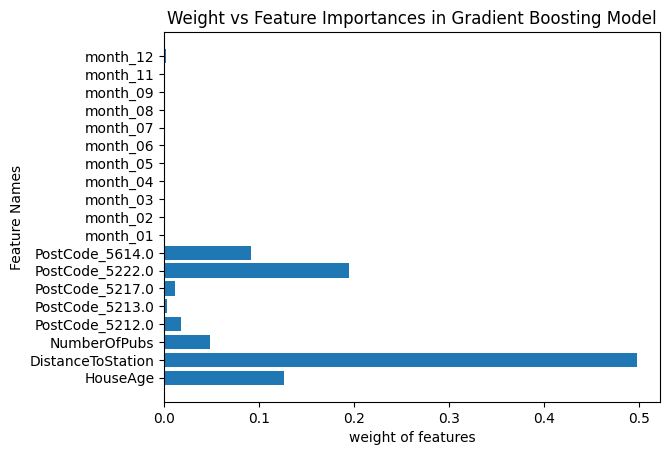

In [74]:
feature_importances = model.named_steps['model'].feature_importances_
feature_importances_names = model.named_steps['model'].feature_names_in_
plt.barh(feature_importances_names, feature_importances)
plt.xlabel('weight of features')
plt.ylabel('Feature Names')
plt.title('Weight vs Feature Importances in Gradient Boosting Model')
plt.show()

As we look over the feature importances plot above we saw some important aspects of the model prediciton... 

- the `month_XXXX` is not a very informative feature that apports to the decision of the model
- `PostCode 5614 and 5622` are very informative features to make the decision
- `DistanceToStation` and `HouseAge` is a very important feature over the model
- All fetures contribute positively to the prediction.

#### Explain the model.1 - Feature Importances of Ridge Model (and others)

In [75]:
feat_imp_dict = dict()
for algo, pipeline in fitted_model.items():
    if algo == 'RD':
        coef_ = pipeline.best_estimator_[1].coef_
        sqr_coef = np.square(coef_)
        feat_imp_dict[algo] = sqr_coef/np.sum(sqr_coef)
    else:
        feat_imp_dict[algo] = pipeline.best_estimator_[1].feature_importances_

In [76]:
models_feat_importance= pd.DataFrame(feat_imp_dict, feature_importances_names)
models_feat_importance.sort_values(by='GB', ascending=False)

,RD,RF,GB,XG
DistanceToStation,0.110584,0.465697,0.497001,0.073575
PostCode_5222.0,0.408617,0.170285,0.194739,0.447887
HouseAge,0.016644,0.137193,0.126481,0.035848
PostCode_5614.0,0.080132,0.080293,0.091165,0.242553
NumberOfPubs,0.034557,0.062120,0.047768,0.023741
PostCode_5212.0,0.231584,0.010505,0.017960,0.052968
PostCode_5217.0,0.017246,0.010126,0.011620,0.052980
PostCode_5213.0,0.095947,0.002518,0.002830,0.008654
month_12,0.000256,0.005846,0.002023,0.004786
month_08,0.000232,0.005135,0.001216,0.007499


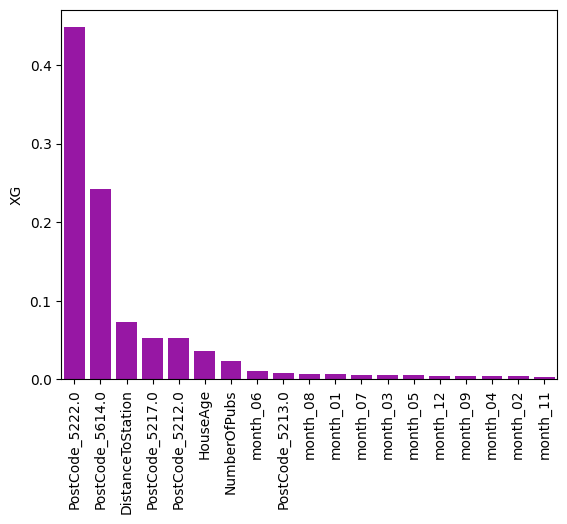

In [77]:
sorted_model_name = 'XG'
sorted_model_importance = models_feat_importance.sort_values(by=sorted_model_name, ascending=False)
sns.barplot(x=sorted_model_importance.index, y=sorted_model_name, data=sorted_model_importance, color='#AA00BB')
plt.xticks(rotation=90)
plt.show()

Finally on the figure above you can see clearly the feature importances of each model and determine which one are importants or not.

### Plotting Decision Trees from GB and XG

For this section you will need graphviz (for Windows), for linux is easy to install just `sudo apt install graphviz`. [Follow the link to download graphviz for windows (or other systems)](https://graphviz.org/download/).

Look at the image below to ensure graphviz is installed correctly.

<img src="img/graphviz.png" width="90%" height="100%">

In [78]:
pd.DataFrame(np.column_stack(feature_importances_names))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,HouseAge,DistanceToStation,NumberOfPubs,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_11,month_12


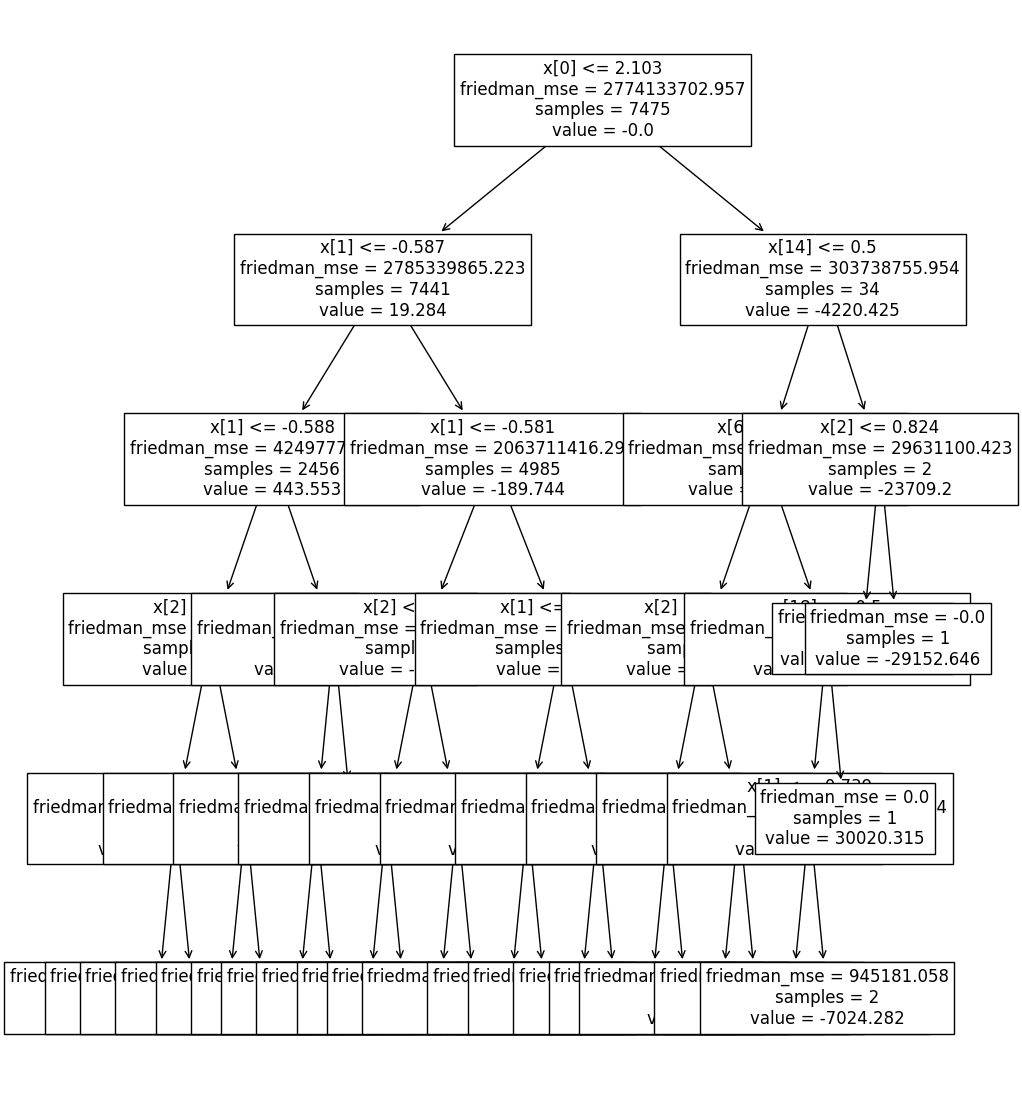

In [79]:
plt.figure(figsize=(10,14))
model_tree = model.named_steps['model'].estimators_[199, 0] # best 200 estimators (max)
plot_tree(model_tree, fontsize=12)
plt.show()

As we see in the image above, GradientBoosting is dividing for each feature the samples, so he decides from if a sample is abover or bellow or equal a value to go to another part of the tree.

Now let's take a look on the XGBoost graph.

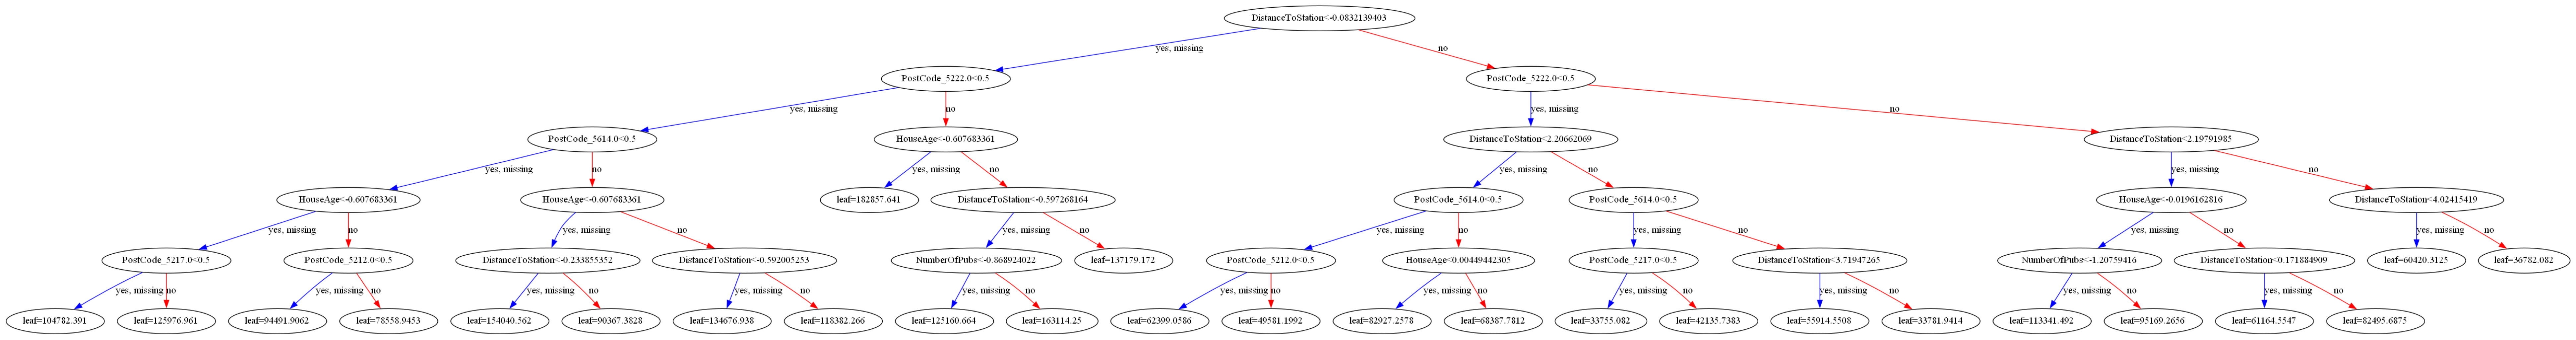

In [80]:
fig, ax = plt.subplots(figsize=(100,100))
model_tree = fitted_model['XG'].best_estimator_[1]
xg.plot_tree(model_tree, ax=ax)
plt.show()

Well is not very clear, but you can zoom to see and find the features and how the model will decide about the features the decision.

#### Saving the Best Performing Model

We need to save and test the loading of the model. We will use dill that is another serialization library.

##### Saving the Best Performing Model.1 - Saving the model

In [81]:
with open('GB.pkl', 'wb') as f:
    dill.dump(model, f)

#### Saving the Best Performing Model.2 - Load the model and test predictions

In [82]:
with open('GB.pkl', 'rb') as f:
    loaded_model = dill.load(f)

In [83]:
loaded_model

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('model',
                 GradientBoostingRegressor(max_depth=5, n_estimators=200))])

In [84]:
loaded_model.predict(X_test)

array([217195.97999167, 350295.94297039, 372501.3634381 , ...,
       726764.99360691, 381840.48355564, 229025.84349574])

In [85]:
X_test.iloc[0].to_json()

'{"TransactionDate":"2021.03","HouseAge":21.0,"DistanceToStation":2244.874723,"NumberOfPubs":3.0,"PostCode":"5217.0"}'

On the code above we validated the loaded model, make some predictions to test the model again and finally we inspected the data to send via JSON to the API.

# NOTE: From this point forward see the document to install FastAPI, PostMan and make the web app front using Heroku.